# Linear Regression from Scratch

Tugas ini merupakan implementasi dari algoritma multiple linear regression. Algoritma multiple linear regression merupakan algoritma untuk memprediksi sebuah variabel y berdasarkan beberapa variabel x.

Program ini akan mendemonstrasikan hasil dari pembuatan modul regresi linear yang dibuat dalam modul terpisah.
Program utama akan dibagi menjadi beberapa tahap sebagai berikut.
1.  Pembacaan File CSV dataset
2.  Converting DataFrame menjadi matriks
3.  Konversi nilai Non-Numerik menjadi Numerik
4.  Penggunaan dan Inisialisasi algoritma Multiple Linear Regression
5.  Pemisahan Variabel dan Proses Regresi
6.  Prediksi berdasarkan model yang telah didapat
7.  Penghitungan error pada prediksi
8.  Visualisasi hasil regresi

Data yang digunakan berasal dari tautan berikut https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

## 1. Membaca File CSV

Pembacaan file CSV dilakukan dengan memanfaatkan library CSV pada Julia. Setelah dilakukan pembacaan, kemudian data akan disimpan pada variabel df.

Data terdiri atas 301 baris dan 9 kolom berikut:
1. Car_Name
2. Year
3. Selling_Price
4. Present_Price
5. Kms_Driven
6. Fuel
7. Seller_Type
8. Transmission
9. Owner

In [2]:
using CSV
using DataFrames

df = DataFrame!(CSV.File("car_data.csv"))
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type
,String,Int64,Float64,Float64,Int64,String,String
1,ritz,2014,3.35,5.59,27000,Petrol,Dealer
2,sx4,2013,4.75,9.54,43000,Diesel,Dealer
3,ciaz,2017,7.25,9.85,6900,Petrol,Dealer
4,wagon r,2011,2.85,4.15,5200,Petrol,Dealer
5,swift,2014,4.6,6.87,42450,Diesel,Dealer
6,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer
7,ciaz,2015,6.75,8.12,18796,Petrol,Dealer
8,s cross,2015,6.5,8.61,33429,Diesel,Dealer
9,ciaz,2016,8.75,8.89,20273,Diesel,Dealer


## 2. Converting DataFrame menjadi Matriks

Konversi ini dilakukan untuk mempermudah langkah selanjutnya yaitu mengolah data non numerik seperti pada kolom Fuel_Type, Seller_Type, dan Transmission menjadi data numerik berupa integer 1 dan 2.

In [3]:
df = df[2:size(df,1),:]
# println(df)
# dataF = df[:,2:size(df,2)]
# println(data)
# data = select(df, Not([:year]))
dataF = df[:,2:size(df,2)]
data = dataF[2:size(dataF,1),:]
data=convert(Matrix,data)
data

299×8 Array{Any,2}:
 2017   7.25   9.85   6900  "Petrol"  "Dealer"  "Manual"     0
 2011   2.85   4.15   5200  "Petrol"  "Dealer"  "Manual"     0
 2014   4.6    6.87  42450  "Diesel"  "Dealer"  "Manual"     0
 2018   9.25   9.83   2071  "Diesel"  "Dealer"  "Manual"     0
 2015   6.75   8.12  18796  "Petrol"  "Dealer"  "Manual"     0
 2015   6.5    8.61  33429  "Diesel"  "Dealer"  "Manual"     0
 2016   8.75   8.89  20273  "Diesel"  "Dealer"  "Manual"     0
 2015   7.45   8.92  42367  "Diesel"  "Dealer"  "Manual"     0
 2017   2.85   3.6    2135  "Petrol"  "Dealer"  "Manual"     0
 2015   6.85  10.38  51000  "Diesel"  "Dealer"  "Manual"     0
 2015   7.5    9.94  15000  "Petrol"  "Dealer"  "Automatic"  0
 2015   6.1    7.71  26000  "Petrol"  "Dealer"  "Manual"     0
 2009   2.25   7.21  77427  "Petrol"  "Dealer"  "Manual"     0
    ⋮                                 ⋮                      
 2016  10.11  13.6   10980  "Petrol"  "Dealer"  "Manual"     0
 2014   4.5    6.4   19000  "Petrol"

## 3. Konversi nilai Non-Numerik menjadi Numerik

Karena algoritma linear regression hanya dapat menerima atribut-atribut numerik (float / int), maka dari itu data pada kolom Fuel_Type, Seller_Type, dan Transmission perlu dilakukan pengolahan lagi agar bisa dilakukan prediksi pada kolom kolom tersebut.

In [4]:
dataC=data
for i in 1:size(data,1)
    
    # Data tahun adalah tahun saat ini(2020) dikurangi dengan tahun keluarnya mobil
    dataC[i,1] = 2020 - data[i,1]
    
    # Apabila mobil tersebut berbahan bakar Petrol maka dikonversi menjadi 2, apabila Diesel akan dikonversi menjadi 1
    if data[i,5] == "Petrol"
        dataC[i,5] = 1
    else
        dataC[i,5] = 2
    end
    
    # Apabila mobil tersebut Dealer maka dikonversi menjadi 2, apabila Individual akan dikonversi menjadi 1
    if data[i,6] == "Dealer"
        dataC[i,6] = 2
    else
        dataC[i,6] = 1
    end
    
    # Apabila mobil tersebut Automatic maka dikonversi menjadi 2, apabila manual akan dikonversi menjadi 1
    if data[i,7] == "Automatic"
        dataC[i,7] = 2
    else
        dataC[i,7] = 1
    end
end
# dataF = convert(DataFrame,dataC)
dataF = DataFrame(dataC, [:year, :selling_price, :present_price, :kms_driven, :fuel, :seller_type, :transmission, :owner])

dataF[!,:year] = convert.(Int64,dataF[!,:year])
dataF[!,:selling_price] = convert.(Float64,dataF[!,:selling_price])
dataF[!,:present_price] = convert.(Float64,dataF[!,:present_price])
dataF[!,:kms_driven] = convert.(Int64,dataF[!,:kms_driven])
dataF[!,:fuel] = convert.(Int64,dataF[!,:fuel])
dataF[!,:seller_type] = convert.(Int64,dataF[!,:seller_type])
dataF[!,:transmission] = convert.(Int64,dataF[!,:transmission])
dataF[!,:owner] = convert.(Int64,dataF[!,:owner])
# println(dataC[0])

dataF

,year,selling_price,present_price,kms_driven,fuel,seller_type,transmission
,Int64,Float64,Float64,Int64,Int64,Int64,Int64
1,3,7.25,9.85,6900,1,2,1
2,9,2.85,4.15,5200,1,2,1
3,6,4.6,6.87,42450,2,2,1
4,2,9.25,9.83,2071,2,2,1
5,5,6.75,8.12,18796,1,2,1
6,5,6.5,8.61,33429,2,2,1
7,4,8.75,8.89,20273,2,2,1
8,5,7.45,8.92,42367,2,2,1
9,3,2.85,3.6,2135,1,2,1


## 4. Menggunakan Algoritma Linear Regression

Setelah data di split, kita akan langsung menggunakan algoritma Linear Regression yang telah kita buat pada file "regression.jl". Untuk menggunakan algoritma tersebut, kita perlu membentuk sebuah struct Regression dengan struktur seperti berikut :
1. testData : dataset untuk testing, sebanyak 20% dari total data masukan
2. data  : dataset untuk training data
3. xVar  : data untuk variable x (variabel bebas)
4. yVar  : data untuk variable y (variabel terikat)
5. model : koefisien dari persamaan regresi linear untuk setiap atribut

Pada implementasi ini, saya menggunakan atribut "Year", "Selling_Price", "Kms_Driven", "Fuel, "Seller_Type", dan "Transmisson" untuk memprediksi "Present_Price".

In [8]:
using Compat, Statistics, DataFrames, LinearAlgebra

include("linearRegression.jl")
using .LinearRegression

n = size(dataF, 1)
n_train = Int(floor(n * 0.8))
training_data = dataF[1:n_train, :]
predicted_data = dataF[n_train+1 : n, :]
println("Full Data")
display(training_data)

,year,selling_price,present_price,kms_driven,fuel,seller_type,transmission
,Int64,Float64,Float64,Int64,Int64,Int64,Int64
1,3,7.25,9.85,6900,1,2,1
2,9,2.85,4.15,5200,1,2,1
3,6,4.6,6.87,42450,2,2,1
4,2,9.25,9.83,2071,2,2,1
5,5,6.75,8.12,18796,1,2,1
6,5,6.5,8.61,33429,2,2,1
7,4,8.75,8.89,20273,2,2,1
8,5,7.45,8.92,42367,2,2,1
9,3,2.85,3.6,2135,1,2,1


Full Data


## 5. Memisahkan Variabel dan Proses Regresi

Pada langkah ini data akan dipisahkan menjadi data untuk variabel bebas (x) dan data untuk variabel terikat (y). Saya memilih kolom present_price sebagai variabel terikat dan kolom year, selling_price, kms_driven, fuel, seller_type, dan transmission sebagai variabel bebas.

Kemudian akan dipanggil fungsi train dan kemudian dilakukan regresi linear terhadap training data.

In [10]:
xVar = []
yVar = []
regression = LinearRegression.Regression(predicted_data,training_data,xVar,"",yVar)
LinearRegression.setyVar(regression, "present_price")
LinearRegression.setxVar(regression, ["year", "selling_price", "kms_driven","fuel","seller_type","transmission"])
train_array = LinearRegression.train(regression)
println(train_array)

[-3.49190243991805, 0.7000625627663632, 1.6516491045454473, 1.2387613878287547e-5, -1.197660197500241, 0.1958489266108252, -0.23551159650041598]


## 6.  Prediksi berdasarkan model yang telah didapat

Pada tahap ini dilakukan prediksi terhadap 20% data yang telah displit tadi, prediksi dilakukan dengan memanggil method prediction. Hasil prediksi akan dimasukkan kedalam array yang akan digunakan untuk visualisasi ata plotting.

In [126]:
prediction_array = LinearRegression.prediction(regression, predicted_data)
println(prediction_array)

[7.256563839084295, 7.355433927762869, 8.676394070925454, 9.603706613248745, 9.33755985292835, 7.694374749219341, 9.240202704798524, 7.345286393197901, 7.148621105162883, 18.82062363860681, 9.327697175907506, 8.039635542532704, 10.955817817285904, 9.710148309517157, 6.686976609987276, 15.81023211099492, 13.50547196379913, 13.150479258273707, 6.555053534396147, 13.741466417324437, 7.420314583086768, 6.069322321567252, 9.365984557648705, 6.069359484408887, 8.565147901367135, 6.12908471323207, 11.10122458393328, 5.730091673107644, 10.266219427689656, 9.397917546770882, 8.98396631997072, 11.69620286026635, 6.9416188643866645, 8.625134878983737, 16.415293803012332, 13.560914011634411, 15.2577349774947, 8.226318953154232, 10.486871293790335, 7.817281066747789, 9.360992063420346, 12.875863585232938, 13.226811721275338, 6.26923204058377, 10.440110724897425, 7.952593051938971, 8.77346219841532, 13.261967783178296, 15.101062317706468, 7.334784630043099, 8.27514713903312, 8.98607950599871, 8.3058

## 7. Error pada Prediksi

Dengan memanggil method meanAbsoluteError dan rootMeanSquareError kita dapat mengetahui tingkat akurasi dari algoritma yang telah kita buat.

In [127]:
mean_absolute_error = LinearRegression.meanAbsoluteError(regression, prediction_array, predicted_data)

Mean absolute error : 1.0849582926522134


In [128]:
root_mean_square_error = LinearRegression.rootMeanSquare(regression, prediction_array, predicted_data)

Root mean square error : 1.451427161016783


## 8. Visualisasi

Setelah dilakukan prediksi dan menyimpan hasil prediksi tadi dalam sebuah array, sekarang saatnya memvisualisasikan hasil regresi yang telah kita buat. Saya membuat library diagram untuk memudahkan dalam visualisasi. Library ini memanfaatkan library Plots yang telah disediakan oleh Julia.

Menampilkan Scatter Plot dari predicted data dan menampilkan Plot Line dari prediction array.

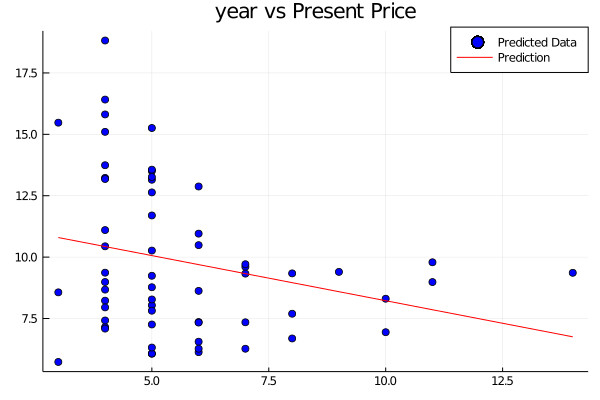

In [129]:
include("diagram.jl")
using .Diagram

# Plotting year terhadap Present Price
Diagram.Visualize("year", predicted_data, n, n_train, prediction_array)

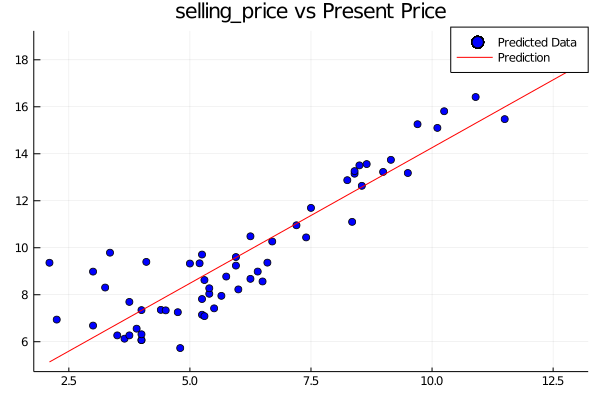

In [130]:
# Plotting selling_price terhadap Present Price

Diagram.Visualize("selling_price", predicted_data, n, n_train, prediction_array)

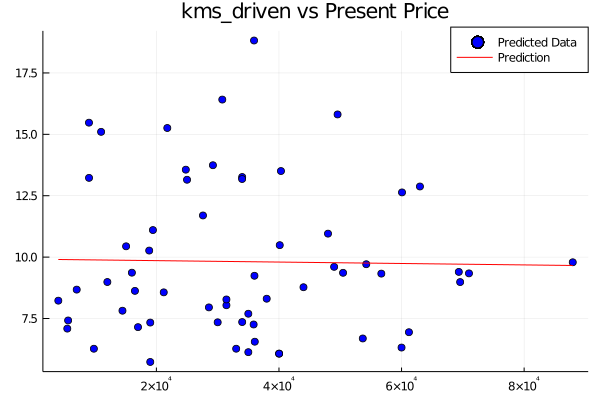

In [131]:
# Plotting kms_driven terhadap Present Price

Diagram.Visualize("kms_driven", predicted_data, n, n_train, prediction_array)

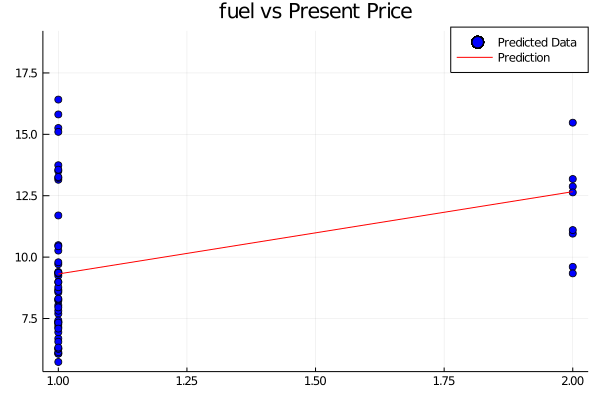

In [132]:
# Plotting fuel terhadap Present Price

Diagram.Visualize("fuel", predicted_data, n, n_train, prediction_array)

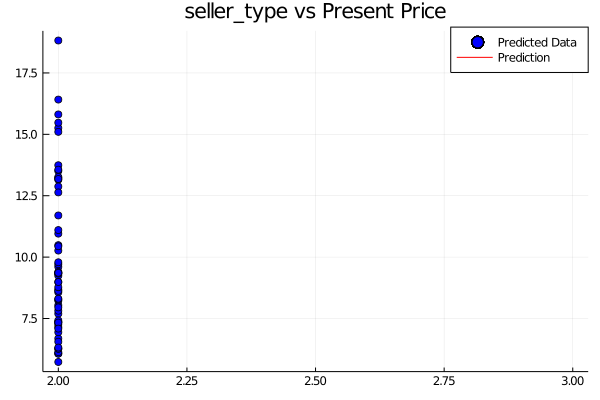

In [133]:
# Plotting seller_type terhadap Present Price

Diagram.Visualize("seller_type", predicted_data, n, n_train, prediction_array)

# tidak ada garis prediksi regresi karena 80% data yang terambil pada kolom seller_type semuanya merupakan dealer.

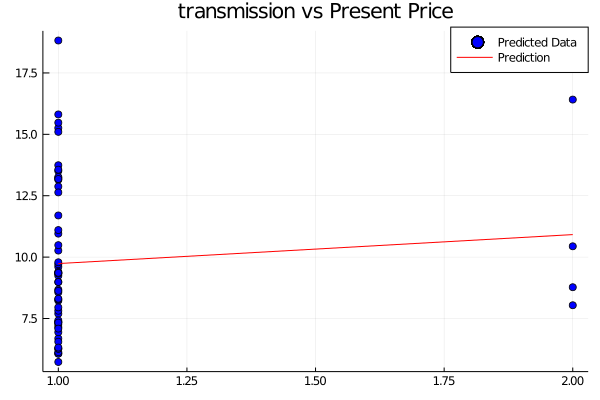

In [134]:
# Plotting transmission terhadap Present Price

Diagram.Visualize("transmission", predicted_data, n, n_train, prediction_array)

# Plotting transmission terhadap Present Price



Seluruh persamaan dalam implementasi ini menggunakan buku rujukan Probability and Statistics for Engineers & Scientists 9th ed., Ronald E. Walpole et al.